In [1]:
import numpy as np
import torch
from torchvision import datasets, transforms
import helper
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F

In [2]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes. '''
    ps = ps.data.numpy().squeeze()
    
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.set_title('Image')
    ax1.axis('off')
    
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    
    plt.tight_layout()

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5),(0.5))])

In [4]:
trainset = datasets.MNIST('MNIST_data/',download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('MNIST_data/',download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [5]:
input_size = 784
hidden_size = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_size[0]),
nn.ReLU(),
nn.Linear(hidden_size[0], hidden_size[1]),
nn.ReLU(),
nn.Linear(hidden_size[1], output_size),
nn.Softmax(dim=1))
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)

In [6]:
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
images[0].shape

torch.Size([1, 784])

In [7]:
ps = model.forward(images[0])

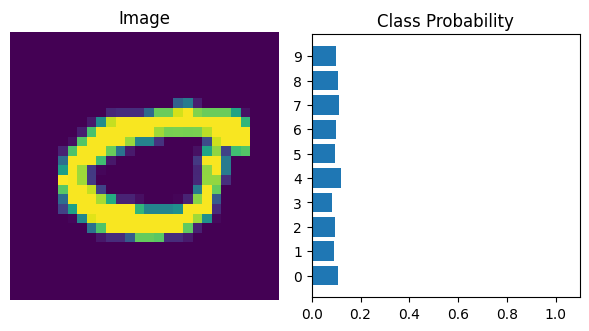

In [8]:
view_classify(images[0].view(1,28,28), ps)